# DeepLabCut Toolbox
https://github.com/AlexEMG/DeepLabCut

Nath\*, Mathis\* et al. *Using DeepLabCut for markerless pose estimation during behavior across species*, (under revision).

This notebook demonstrates the necessary steps to use DeepLabCut for your own project.
This shows the most simple code to do so, but many of the functions have additional features, so please check out the overview & the protocol paper!

This notebook illustrates how to:
- create a project
- extract training frames
- label the frames
- plot the labeled images
- create a training set
- train a network
- evaluate a network
- analyze a novel video
- create an automatically labeled video 
- plot the trajectories

*Note*: Refine a network based after the network was trained on just a few labeled images is illustrated in "Demo-labeledexample-MouseReaching.ipynb". This demo also contains an already labeled data set and is perhaps the best starting point for brand new users.

## Create a new project

It is always good idea to keep the projects seperate. This function creates a new project with subdirectories and a basic configuration file in the user defined directory otherwise the project is created in the current working directory.

You can always add new videos to the project at any stage of the project. 

In [1]:
import deeplabcut

In [2]:
task='LinearChamber2' # Enter the name of your experiment Task
experimenter='KAIST' # Enter the name of the experimenter
video=['C:\\Users\\user\\Desktop\\Video_files_Deeplabcut\\LinearChamber\\20180906\\20180906_Trial2.mpg'] # Enter the paths of your videos you want to grab frames from.
deeplabcut.create_new_project(task,experimenter,video, working_directory='C:\\Users\\user\\Desktop',copy_videos=False) #change the working directory to where you want the folders created.

Project "C:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07" already exists!


## Extract frames from videos 
A key point for a successful feature detector is to select diverse frames, which are typical for the behavior you study that should be labeled.

This function selects N frames either uniformly sampled from a particular video (or folder) (algo=='uniform'). Note: this might not yield diverse frames, if the behavior is sparsely distributed (consider using kmeans), and/or select frames manually etc.

Also make sure to get select data from different (behavioral) sessions and different animals if those vary substantially (to train an invariant feature detector).

Individual images should not be too big (i.e. < 850 x 850 pixel). Although this can be taken care of later as well, it is advisable to crop the frames, to remove unnecessary parts of the frame as much as possible.

Always check the output of cropping. If you are happy with the results proceed to labeling.

In [2]:
%matplotlib inline
path_config_file = 'C:\\Users\\user\\Desktop\\LinearChamber2-KAIST-2019-01-07\\config.yaml'

In [ ]:
deeplabcut.extract_frames(path_config_file,'automatic','kmeans',crop=True, checkcropping=False) #there are other ways to grab frames, such as by clustering 'kmeans'; please see the paper. 
#You can change the cropping to false, then delete the checkcropping part!

Reading config file successfully...
Make sure you change the crop parameters in the config.yaml file. The default parameters are set to the video dimensions.
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 600.21  seconds.
Extracting and downsampling... 17959  frames from the video.


11192it [00:12, 868.64it/s]

## Label the extracted frames
Only videos in the config file can be used to extract the frames. Extracted labels for each video are stored in the project directory under the subdirectory **'labeled-data'**. Each subdirectory is named after the name of the video. The toolbox has a labeling toolbox which could be used for labeling. 

In [3]:
%gui wx
deeplabcut.label_frames(path_config_file, Screens=2, winHack=0.5)

RuntimeError: wrapped C/C++ object of type DirDialog has been deleted

**Check the labels**

Checking if the labels were created and stored correctly is beneficial for training, since labeling is one of the most critical parts for creating the training dataset. The DeepLabCut toolbox provides a function `check\_labels'  to do so. It is used as follows:

In [4]:
deeplabcut.check_labels(path_config_file) #this creates a subdirectory with the frames + your labels

Creating images with labels by KAIST.
They are stored in the following folder: C:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\labeled-data\20180906_Trial2_labeled.
If all the labels are ok, then use the function 'create_training_dataset' to create the training dataset!


If the labels need adjusted, you can use the refinement GUI to move them around! Check that out below.

## Create a training dataset
This function generates the training data information for DeepCut (which requires a mat file) based on the pandas dataframes that hold label information. The user can set the fraction of the training set size (from all labeled image in the hd5 file) in the config.yaml file. While creating the dataset, the user can create multiple shuffles. 

After running this script the training dataset is created and saved in the project directory under the subdirectory **'training-datasets'**

This function also creates new subdirectories under **dlc-models** and appends the project config.yaml file with the correct path to the training and testing pose configuration file. These files hold the parameters for training the network. Such an example file is provided with the toolbox and named as **pose_cfg.yaml**.

Now it is the time to start training the network!

In [5]:
deeplabcut.create_training_dataset(path_config_file)

The training dataset is successfully created. Use the function 'train_network' to start training. Happy training!


## Start training - If you want to use a CPU, continue. 
### If you want to use your GPU, you need to exit here and either work from the Docker container, your own TensorFlow installation in an Anaconda env

This function trains the network for a specific shuffle of the training dataset. 

In [5]:
#max_iter: c:\users\user\Anaconda3\envs\DLC2\Lib\site-packages\deeplabcut\pose_estimation_tensorflow\train.py에서 수정 가능.
#snapshot 위치: C:\Users\user\Desktop\LinearChamber-KAIST-2018-11-19\dlc-models\iteration-0\LinearChamberNov19-trainset95shuffle1\train
#중간부터 retraining 하고 싶은 경우
#C:\Users\user\Desktop\LinearChamber-KAIST-2018-11-19\dlc-models\iteration-0\LinearChamberNov19-trainset95shuffle1\train에서 pose_cfg.yaml을 찾아 init_weights를 다음과 같이 바꾼다.
#C:\Users\user\Anaconda3\envs\DLC2\lib\sitepackages\deeplabcut\pose_estimation_tensorflow\models\pretrained\resnet_v1_50.ckpt
deeplabcut.train_network(path_config_file, gputouse=0, max_snapshots_to_keep=None)

Config:
{'all_joints': [[0],
                [1],
                [2],
                [3],
                [4],
                [5],
                [6],
                [7],
                [8],
                [9],
                [10],
                [11],
                [12]],
 'all_joints_names': ['L1',
                      'L2',
                      'L3',
                      'L4',
                      'R1',
                      'R2',
                      'R3',
                      'R4',
                      'Tether',
                      'Nose',
                      'LeftEar',
                      'RightEar',
                      'TailBase'],
 'batch_size': 1,
 'bottomheight': 400,
 'crop': True,
 'crop_pad': 0,
 'cropratio': 0.4,
 'dataset': 'training-datasets\\iteration-3\\UnaugmentedDataSet_LinearChamber2Jan7\\LinearChamber2_KAIST80shuffle1.mat',
 'dataset_type': 'default',
 'display_iters': 1000,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': 'D:

INFO:tensorflow:Restoring parameters from D:\Users\user\Desktop\LinearChamber-KAIST-2018-11-19\dlc-models\iteration-3\LinearChamberNov19-trainset80shuffle1\train\snapshot-195000


Restoring parameters from D:\Users\user\Desktop\LinearChamber-KAIST-2018-11-19\dlc-models\iteration-3\LinearChamberNov19-trainset80shuffle1\train\snapshot-195000


Training parameter:
{'stride': 8.0, 'weigh_part_predictions': False, 'weigh_negatives': False, 'fg_fraction': 0.25, 'weigh_only_present_joints': False, 'mean_pixel': [123.68, 116.779, 103.939], 'shuffle': True, 'snapshot_prefix': 'D:\\Users\\user\\Desktop\\LinearChamber2-KAIST-2019-01-07\\dlc-models\\iteration-3\\LinearChamber2Jan7-trainset80shuffle1\\train\\snapshot', 'log_dir': 'log', 'global_scale': 0.8, 'location_refinement': True, 'locref_stdev': 7.2801, 'locref_loss_weight': 0.05, 'locref_huber_loss': True, 'optimizer': 'sgd', 'intermediate_supervision': True, 'intermediate_supervision_layer': 12, 'regularize': True, 'weight_decay': 0.001, 'mirror': False, 'crop_pad': 0, 'scoremap_dir': 'test', 'dataset_type': 'default', 'use_gt_segm': False, 'batch_size': 1, 'video': False, 'video_batch': False, 'crop': True, 'cropratio': 0.4, 'minsize': 100, 'leftwidth': 400, 'rightwidth': 400, 'topheight': 400, 'bottomheight': 400, 'all_joints': [[0], [1], [2], [3], [4], [5], [6], [7], [8], [9

iteration: 5000 loss: 0.0260 lr: 0.001


INFO:tensorflow:D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-5000 is not in all_model_checkpoint_paths. Manually adding it.


D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-5000 is not in all_model_checkpoint_paths. Manually adding it.
iteration: 10000 loss: 0.0138 lr: 0.001


INFO:tensorflow:D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-10000 is not in all_model_checkpoint_paths. Manually adding it.


D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-10000 is not in all_model_checkpoint_paths. Manually adding it.
iteration: 15000 loss: 0.0117 lr: 0.001


INFO:tensorflow:D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-15000 is not in all_model_checkpoint_paths. Manually adding it.


D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-15000 is not in all_model_checkpoint_paths. Manually adding it.
iteration: 20000 loss: 0.0105 lr: 0.001


INFO:tensorflow:D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-20000 is not in all_model_checkpoint_paths. Manually adding it.


D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-20000 is not in all_model_checkpoint_paths. Manually adding it.
iteration: 25000 loss: 0.0098 lr: 0.001


INFO:tensorflow:D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-25000 is not in all_model_checkpoint_paths. Manually adding it.


D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-25000 is not in all_model_checkpoint_paths. Manually adding it.
iteration: 30000 loss: 0.0091 lr: 0.001


INFO:tensorflow:D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-30000 is not in all_model_checkpoint_paths. Manually adding it.


D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-30000 is not in all_model_checkpoint_paths. Manually adding it.
iteration: 35000 loss: 0.0086 lr: 0.001


INFO:tensorflow:D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-35000 is not in all_model_checkpoint_paths. Manually adding it.


D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-35000 is not in all_model_checkpoint_paths. Manually adding it.
iteration: 40000 loss: 0.0083 lr: 0.001


INFO:tensorflow:D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-40000 is not in all_model_checkpoint_paths. Manually adding it.


D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-40000 is not in all_model_checkpoint_paths. Manually adding it.
iteration: 45000 loss: 0.0079 lr: 0.001


INFO:tensorflow:D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-45000 is not in all_model_checkpoint_paths. Manually adding it.


D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-45000 is not in all_model_checkpoint_paths. Manually adding it.
iteration: 50000 loss: 0.0077 lr: 0.001


INFO:tensorflow:D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-50000 is not in all_model_checkpoint_paths. Manually adding it.


D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-50000 is not in all_model_checkpoint_paths. Manually adding it.
iteration: 55000 loss: 0.0073 lr: 0.001


INFO:tensorflow:D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-55000 is not in all_model_checkpoint_paths. Manually adding it.


D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-55000 is not in all_model_checkpoint_paths. Manually adding it.
iteration: 60000 loss: 0.0071 lr: 0.001


INFO:tensorflow:D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-60000 is not in all_model_checkpoint_paths. Manually adding it.


D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-60000 is not in all_model_checkpoint_paths. Manually adding it.
iteration: 65000 loss: 0.0068 lr: 0.001


INFO:tensorflow:D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-65000 is not in all_model_checkpoint_paths. Manually adding it.


D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-65000 is not in all_model_checkpoint_paths. Manually adding it.
iteration: 70000 loss: 0.0066 lr: 0.001


INFO:tensorflow:D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-70000 is not in all_model_checkpoint_paths. Manually adding it.


D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-70000 is not in all_model_checkpoint_paths. Manually adding it.
iteration: 75000 loss: 0.0066 lr: 0.001


INFO:tensorflow:D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-75000 is not in all_model_checkpoint_paths. Manually adding it.


D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-75000 is not in all_model_checkpoint_paths. Manually adding it.
iteration: 80000 loss: 0.0063 lr: 0.001


INFO:tensorflow:D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-80000 is not in all_model_checkpoint_paths. Manually adding it.


D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-80000 is not in all_model_checkpoint_paths. Manually adding it.
iteration: 85000 loss: 0.0062 lr: 0.001


INFO:tensorflow:D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-85000 is not in all_model_checkpoint_paths. Manually adding it.


D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-85000 is not in all_model_checkpoint_paths. Manually adding it.
iteration: 90000 loss: 0.0060 lr: 0.001


INFO:tensorflow:D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-90000 is not in all_model_checkpoint_paths. Manually adding it.


D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-90000 is not in all_model_checkpoint_paths. Manually adding it.
iteration: 95000 loss: 0.0059 lr: 0.001


INFO:tensorflow:D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-95000 is not in all_model_checkpoint_paths. Manually adding it.


D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-95000 is not in all_model_checkpoint_paths. Manually adding it.
iteration: 100000 loss: 0.0057 lr: 0.001


INFO:tensorflow:D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-100000 is not in all_model_checkpoint_paths. Manually adding it.


D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-100000 is not in all_model_checkpoint_paths. Manually adding it.
iteration: 105000 loss: 0.0056 lr: 0.001


INFO:tensorflow:D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-105000 is not in all_model_checkpoint_paths. Manually adding it.


D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-105000 is not in all_model_checkpoint_paths. Manually adding it.
iteration: 110000 loss: 0.0054 lr: 0.001


INFO:tensorflow:D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-110000 is not in all_model_checkpoint_paths. Manually adding it.


D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-110000 is not in all_model_checkpoint_paths. Manually adding it.
iteration: 115000 loss: 0.0054 lr: 0.001


INFO:tensorflow:D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-115000 is not in all_model_checkpoint_paths. Manually adding it.


D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-115000 is not in all_model_checkpoint_paths. Manually adding it.
iteration: 120000 loss: 0.0054 lr: 0.001


INFO:tensorflow:D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-120000 is not in all_model_checkpoint_paths. Manually adding it.


D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-120000 is not in all_model_checkpoint_paths. Manually adding it.
iteration: 125000 loss: 0.0052 lr: 0.001


INFO:tensorflow:D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-125000 is not in all_model_checkpoint_paths. Manually adding it.


D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-125000 is not in all_model_checkpoint_paths. Manually adding it.
iteration: 130000 loss: 0.0051 lr: 0.001


INFO:tensorflow:D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-130000 is not in all_model_checkpoint_paths. Manually adding it.


D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-130000 is not in all_model_checkpoint_paths. Manually adding it.
iteration: 135000 loss: 0.0051 lr: 0.001


INFO:tensorflow:D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-135000 is not in all_model_checkpoint_paths. Manually adding it.


D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-135000 is not in all_model_checkpoint_paths. Manually adding it.
iteration: 140000 loss: 0.0050 lr: 0.001


INFO:tensorflow:D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-140000 is not in all_model_checkpoint_paths. Manually adding it.


D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-140000 is not in all_model_checkpoint_paths. Manually adding it.
iteration: 145000 loss: 0.0049 lr: 0.001


INFO:tensorflow:D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-145000 is not in all_model_checkpoint_paths. Manually adding it.


D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-145000 is not in all_model_checkpoint_paths. Manually adding it.
iteration: 150000 loss: 0.0048 lr: 0.001


INFO:tensorflow:D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-150000 is not in all_model_checkpoint_paths. Manually adding it.


D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-150000 is not in all_model_checkpoint_paths. Manually adding it.
iteration: 155000 loss: 0.0048 lr: 0.001


INFO:tensorflow:D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-155000 is not in all_model_checkpoint_paths. Manually adding it.


D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-155000 is not in all_model_checkpoint_paths. Manually adding it.
iteration: 160000 loss: 0.0047 lr: 0.001


INFO:tensorflow:D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-160000 is not in all_model_checkpoint_paths. Manually adding it.


D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-160000 is not in all_model_checkpoint_paths. Manually adding it.
iteration: 165000 loss: 0.0047 lr: 0.001


INFO:tensorflow:D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-165000 is not in all_model_checkpoint_paths. Manually adding it.


D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-165000 is not in all_model_checkpoint_paths. Manually adding it.
iteration: 170000 loss: 0.0046 lr: 0.001


INFO:tensorflow:D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-170000 is not in all_model_checkpoint_paths. Manually adding it.


D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-170000 is not in all_model_checkpoint_paths. Manually adding it.
iteration: 175000 loss: 0.0044 lr: 0.001


INFO:tensorflow:D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-175000 is not in all_model_checkpoint_paths. Manually adding it.


D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-175000 is not in all_model_checkpoint_paths. Manually adding it.
iteration: 180000 loss: 0.0045 lr: 0.001


INFO:tensorflow:D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-180000 is not in all_model_checkpoint_paths. Manually adding it.


D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-180000 is not in all_model_checkpoint_paths. Manually adding it.
iteration: 185000 loss: 0.0046 lr: 0.001


INFO:tensorflow:D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-185000 is not in all_model_checkpoint_paths. Manually adding it.


D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-185000 is not in all_model_checkpoint_paths. Manually adding it.
iteration: 190000 loss: 0.0044 lr: 0.001


INFO:tensorflow:D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-190000 is not in all_model_checkpoint_paths. Manually adding it.


D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-190000 is not in all_model_checkpoint_paths. Manually adding it.
iteration: 195000 loss: 0.0043 lr: 0.001


INFO:tensorflow:D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-195000 is not in all_model_checkpoint_paths. Manually adding it.


D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-195000 is not in all_model_checkpoint_paths. Manually adding it.
iteration: 200000 loss: 0.0042 lr: 0.001


INFO:tensorflow:D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-200000 is not in all_model_checkpoint_paths. Manually adding it.


D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-200000 is not in all_model_checkpoint_paths. Manually adding it.
iteration: 205000 loss: 0.0043 lr: 0.001


INFO:tensorflow:D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-205000 is not in all_model_checkpoint_paths. Manually adding it.


D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-205000 is not in all_model_checkpoint_paths. Manually adding it.
iteration: 210000 loss: 0.0041 lr: 0.001


INFO:tensorflow:D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-210000 is not in all_model_checkpoint_paths. Manually adding it.


D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-210000 is not in all_model_checkpoint_paths. Manually adding it.
iteration: 215000 loss: 0.0041 lr: 0.001


INFO:tensorflow:D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-215000 is not in all_model_checkpoint_paths. Manually adding it.


D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-215000 is not in all_model_checkpoint_paths. Manually adding it.
iteration: 220000 loss: 0.0042 lr: 0.001


INFO:tensorflow:D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-220000 is not in all_model_checkpoint_paths. Manually adding it.


D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-220000 is not in all_model_checkpoint_paths. Manually adding it.
iteration: 225000 loss: 0.0041 lr: 0.001


INFO:tensorflow:D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-225000 is not in all_model_checkpoint_paths. Manually adding it.


D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-225000 is not in all_model_checkpoint_paths. Manually adding it.
iteration: 230000 loss: 0.0042 lr: 0.001


INFO:tensorflow:D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-230000 is not in all_model_checkpoint_paths. Manually adding it.


D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-230000 is not in all_model_checkpoint_paths. Manually adding it.
iteration: 235000 loss: 0.0040 lr: 0.001


INFO:tensorflow:D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-235000 is not in all_model_checkpoint_paths. Manually adding it.


D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-235000 is not in all_model_checkpoint_paths. Manually adding it.
iteration: 240000 loss: 0.0040 lr: 0.001


INFO:tensorflow:D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-240000 is not in all_model_checkpoint_paths. Manually adding it.


D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-240000 is not in all_model_checkpoint_paths. Manually adding it.
iteration: 245000 loss: 0.0040 lr: 0.001


INFO:tensorflow:D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-245000 is not in all_model_checkpoint_paths. Manually adding it.


D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-245000 is not in all_model_checkpoint_paths. Manually adding it.
iteration: 250000 loss: 0.0040 lr: 0.001


INFO:tensorflow:D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-250000 is not in all_model_checkpoint_paths. Manually adding it.


D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-250000 is not in all_model_checkpoint_paths. Manually adding it.
iteration: 255000 loss: 0.0039 lr: 0.001


INFO:tensorflow:D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-255000 is not in all_model_checkpoint_paths. Manually adding it.


D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-255000 is not in all_model_checkpoint_paths. Manually adding it.
iteration: 260000 loss: 0.0039 lr: 0.001


INFO:tensorflow:D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-260000 is not in all_model_checkpoint_paths. Manually adding it.


D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-260000 is not in all_model_checkpoint_paths. Manually adding it.
iteration: 265000 loss: 0.0039 lr: 0.001


INFO:tensorflow:D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-265000 is not in all_model_checkpoint_paths. Manually adding it.


D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-265000 is not in all_model_checkpoint_paths. Manually adding it.
iteration: 270000 loss: 0.0038 lr: 0.001


INFO:tensorflow:D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-270000 is not in all_model_checkpoint_paths. Manually adding it.


D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-270000 is not in all_model_checkpoint_paths. Manually adding it.
iteration: 275000 loss: 0.0038 lr: 0.001


INFO:tensorflow:D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-275000 is not in all_model_checkpoint_paths. Manually adding it.


D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-275000 is not in all_model_checkpoint_paths. Manually adding it.
iteration: 280000 loss: 0.0038 lr: 0.001


INFO:tensorflow:D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-280000 is not in all_model_checkpoint_paths. Manually adding it.


D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-280000 is not in all_model_checkpoint_paths. Manually adding it.
iteration: 285000 loss: 0.0037 lr: 0.001


INFO:tensorflow:D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-285000 is not in all_model_checkpoint_paths. Manually adding it.


D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-285000 is not in all_model_checkpoint_paths. Manually adding it.
iteration: 290000 loss: 0.0037 lr: 0.001


INFO:tensorflow:D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-290000 is not in all_model_checkpoint_paths. Manually adding it.


D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-290000 is not in all_model_checkpoint_paths. Manually adding it.
iteration: 295000 loss: 0.0037 lr: 0.001


INFO:tensorflow:D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-295000 is not in all_model_checkpoint_paths. Manually adding it.


D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-295000 is not in all_model_checkpoint_paths. Manually adding it.
iteration: 300000 loss: 0.0037 lr: 0.001


INFO:tensorflow:D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-300000 is not in all_model_checkpoint_paths. Manually adding it.


D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-300000 is not in all_model_checkpoint_paths. Manually adding it.
Exception in thread Thread-6:
Traceback (most recent call last):
  File "D:\Users\user\Anaconda3\envs\DLC2_copy\lib\site-packages\tensorflow\python\client\session.py", line 1322, in _do_call
    return fn(*args)
  File "D:\Users\user\Anaconda3\envs\DLC2_copy\lib\site-packages\tensorflow\python\client\session.py", line 1307, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "D:\Users\user\Anaconda3\envs\DLC2_copy\lib\site-packages\tensorflow\python\client\session.py", line 1409, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.CancelledError: Enqueue operation was cancelled
	 [[Node: fifo_queue_enqueue = QueueEnqueueV2[Tcomponents=[DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT], timeout_ms=-1, _device="/job:localhost/replica:0/tas

The network is now trained and ready to evaluate. Use the function 'evaluate_network' to evaluate the network.


## Start evaluating
This funtion evaluates a trained model for a specific shuffle/shuffles at a particular state or all the states on the data set (images)
and stores the results as .csv file in a subdirectory under **evaluation-results**

In [6]:
deeplabcut.evaluate_network(path_config_file, plotting=False, gputouse=0)

D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07/evaluation-results/  already exists!


Config:
{'all_joints': [[0],
                [1],
                [2],
                [3],
                [4],
                [5],
                [6],
                [7],
                [8],
                [9],
                [10],
                [11],
                [12]],
 'all_joints_names': ['L1',
                      'L2',
                      'L3',
                      'L4',
                      'R1',
                      'R2',
                      'R3',
                      'R4',
                      'Tether',
                      'Nose',
                      'LeftEar',
                      'RightEar',
                      'TailBase'],
 'batch_size': 1,
 'bottomheight': 400,
 'crop': True,
 'crop_pad': 0,
 'cropratio': 0.4,
 'dataset': 'training-datasets\\iteration-3\\UnaugmentedDataSet_LinearChamber2Jan7\\LinearChamber2_KAIST80shuffle1.mat',
 'dataset_type': 'default',
 'display_iters': 5000,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': 'C:

Running  DeepCut_resnet101_LinearChamber2Jan7shuffle1_5000  with # of trainingiterations: 5000
INFO:tensorflow:Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-5000


Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-5000


Analyzing data...


656it [00:32, 18.58it/s]


Done and results stored for snapshot:  snapshot-5000
Results for 5000  training iterations: 80 1 train error: 8.07 pixels. Test error: 8.64  pixels.
With pcutoff of 0.1  train error: 7.03 pixels. Test error: 8.04 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Running  DeepCut_resnet101_LinearChamber2Jan7shuffle1_10000  with # of trainingiterations: 10000
INFO:tensorflow:Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-10000


Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-10000


Analyzing data...


656it [00:33, 19.48it/s]


Done and results stored for snapshot:  snapshot-10000
Results for 10000  training iterations: 80 1 train error: 4.93 pixels. Test error: 5.37  pixels.
With pcutoff of 0.1  train error: 4.81 pixels. Test error: 5.34 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Running  DeepCut_resnet101_LinearChamber2Jan7shuffle1_15000  with # of trainingiterations: 15000
INFO:tensorflow:Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-15000


Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-15000


Analyzing data...


656it [00:33, 18.26it/s]


Done and results stored for snapshot:  snapshot-15000
Results for 15000  training iterations: 80 1 train error: 4.5 pixels. Test error: 5.11  pixels.
With pcutoff of 0.1  train error: 4.49 pixels. Test error: 5.08 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Running  DeepCut_resnet101_LinearChamber2Jan7shuffle1_20000  with # of trainingiterations: 20000
INFO:tensorflow:Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-20000


Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-20000


Analyzing data...


656it [00:33, 17.70it/s]


Done and results stored for snapshot:  snapshot-20000
Results for 20000  training iterations: 80 1 train error: 4.28 pixels. Test error: 4.86  pixels.
With pcutoff of 0.1  train error: 4.28 pixels. Test error: 4.84 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Running  DeepCut_resnet101_LinearChamber2Jan7shuffle1_25000  with # of trainingiterations: 25000
INFO:tensorflow:Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-25000


Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-25000


Analyzing data...


656it [00:33, 19.53it/s]


Done and results stored for snapshot:  snapshot-25000
Results for 25000  training iterations: 80 1 train error: 3.85 pixels. Test error: 4.61  pixels.
With pcutoff of 0.1  train error: 3.85 pixels. Test error: 4.59 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Running  DeepCut_resnet101_LinearChamber2Jan7shuffle1_30000  with # of trainingiterations: 30000
INFO:tensorflow:Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-30000


Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-30000


Analyzing data...


656it [00:33, 19.85it/s]


Done and results stored for snapshot:  snapshot-30000
Results for 30000  training iterations: 80 1 train error: 3.66 pixels. Test error: 4.42  pixels.
With pcutoff of 0.1  train error: 3.66 pixels. Test error: 4.34 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Running  DeepCut_resnet101_LinearChamber2Jan7shuffle1_35000  with # of trainingiterations: 35000
INFO:tensorflow:Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-35000


Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-35000


Analyzing data...


656it [00:34, 17.57it/s]


Done and results stored for snapshot:  snapshot-35000
Results for 35000  training iterations: 80 1 train error: 3.43 pixels. Test error: 4.14  pixels.
With pcutoff of 0.1  train error: 3.43 pixels. Test error: 4.04 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Running  DeepCut_resnet101_LinearChamber2Jan7shuffle1_40000  with # of trainingiterations: 40000
INFO:tensorflow:Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-40000


Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-40000


Analyzing data...


656it [00:34, 17.38it/s]


Done and results stored for snapshot:  snapshot-40000
Results for 40000  training iterations: 80 1 train error: 3.43 pixels. Test error: 4.32  pixels.
With pcutoff of 0.1  train error: 3.42 pixels. Test error: 4.22 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Running  DeepCut_resnet101_LinearChamber2Jan7shuffle1_45000  with # of trainingiterations: 45000
INFO:tensorflow:Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-45000


Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-45000


Analyzing data...


656it [00:34, 17.67it/s]


Done and results stored for snapshot:  snapshot-45000
Results for 45000  training iterations: 80 1 train error: 3.26 pixels. Test error: 4.0  pixels.
With pcutoff of 0.1  train error: 3.26 pixels. Test error: 3.89 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Running  DeepCut_resnet101_LinearChamber2Jan7shuffle1_50000  with # of trainingiterations: 50000
INFO:tensorflow:Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-50000


Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-50000


Analyzing data...


656it [00:34, 19.24it/s]


Done and results stored for snapshot:  snapshot-50000
Results for 50000  training iterations: 80 1 train error: 3.16 pixels. Test error: 4.14  pixels.
With pcutoff of 0.1  train error: 3.16 pixels. Test error: 4.06 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Running  DeepCut_resnet101_LinearChamber2Jan7shuffle1_55000  with # of trainingiterations: 55000
INFO:tensorflow:Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-55000


Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-55000


Analyzing data...


656it [00:33, 19.45it/s]


Done and results stored for snapshot:  snapshot-55000
Results for 55000  training iterations: 80 1 train error: 3.04 pixels. Test error: 4.56  pixels.
With pcutoff of 0.1  train error: 3.04 pixels. Test error: 3.94 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Running  DeepCut_resnet101_LinearChamber2Jan7shuffle1_60000  with # of trainingiterations: 60000
INFO:tensorflow:Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-60000


Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-60000


Analyzing data...


656it [00:32, 19.96it/s]


Done and results stored for snapshot:  snapshot-60000
Results for 60000  training iterations: 80 1 train error: 3.05 pixels. Test error: 4.17  pixels.
With pcutoff of 0.1  train error: 2.93 pixels. Test error: 3.57 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Running  DeepCut_resnet101_LinearChamber2Jan7shuffle1_65000  with # of trainingiterations: 65000
INFO:tensorflow:Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-65000


Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-65000


Analyzing data...


656it [00:34, 16.39it/s]


Done and results stored for snapshot:  snapshot-65000
Results for 65000  training iterations: 80 1 train error: 3.45 pixels. Test error: 4.94  pixels.
With pcutoff of 0.1  train error: 3.44 pixels. Test error: 4.31 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Running  DeepCut_resnet101_LinearChamber2Jan7shuffle1_70000  with # of trainingiterations: 70000
INFO:tensorflow:Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-70000


Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-70000


Analyzing data...


656it [00:33, 19.44it/s]


Done and results stored for snapshot:  snapshot-70000
Results for 70000  training iterations: 80 1 train error: 3.02 pixels. Test error: 4.48  pixels.
With pcutoff of 0.1  train error: 3.02 pixels. Test error: 3.93 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Running  DeepCut_resnet101_LinearChamber2Jan7shuffle1_75000  with # of trainingiterations: 75000
INFO:tensorflow:Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-75000


Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-75000


Analyzing data...


656it [00:34, 19.24it/s]


Done and results stored for snapshot:  snapshot-75000
Results for 75000  training iterations: 80 1 train error: 2.86 pixels. Test error: 4.65  pixels.
With pcutoff of 0.1  train error: 2.85 pixels. Test error: 3.54 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Running  DeepCut_resnet101_LinearChamber2Jan7shuffle1_80000  with # of trainingiterations: 80000
INFO:tensorflow:Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-80000


Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-80000


Analyzing data...


656it [00:32, 19.89it/s]


Done and results stored for snapshot:  snapshot-80000
Results for 80000  training iterations: 80 1 train error: 2.99 pixels. Test error: 4.99  pixels.
With pcutoff of 0.1  train error: 2.99 pixels. Test error: 3.87 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Running  DeepCut_resnet101_LinearChamber2Jan7shuffle1_85000  with # of trainingiterations: 85000
INFO:tensorflow:Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-85000


Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-85000


Analyzing data...


656it [00:33, 16.77it/s]


Done and results stored for snapshot:  snapshot-85000
Results for 85000  training iterations: 80 1 train error: 2.98 pixels. Test error: 4.29  pixels.
With pcutoff of 0.1  train error: 2.98 pixels. Test error: 3.67 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Running  DeepCut_resnet101_LinearChamber2Jan7shuffle1_90000  with # of trainingiterations: 90000
INFO:tensorflow:Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-90000


Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-90000


Analyzing data...


656it [00:32, 16.31it/s]


Done and results stored for snapshot:  snapshot-90000
Results for 90000  training iterations: 80 1 train error: 3.2 pixels. Test error: 4.9  pixels.
With pcutoff of 0.1  train error: 3.2 pixels. Test error: 3.79 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Running  DeepCut_resnet101_LinearChamber2Jan7shuffle1_95000  with # of trainingiterations: 95000
INFO:tensorflow:Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-95000


Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-95000


Analyzing data...


656it [00:35, 16.31it/s]


Done and results stored for snapshot:  snapshot-95000
Results for 95000  training iterations: 80 1 train error: 3.0 pixels. Test error: 4.79  pixels.
With pcutoff of 0.1  train error: 3.0 pixels. Test error: 3.66 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Running  DeepCut_resnet101_LinearChamber2Jan7shuffle1_100000  with # of trainingiterations: 100000
INFO:tensorflow:Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-100000


Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-100000


Analyzing data...


656it [00:35, 16.66it/s]


Done and results stored for snapshot:  snapshot-100000
Results for 100000  training iterations: 80 1 train error: 3.19 pixels. Test error: 5.18  pixels.
With pcutoff of 0.1  train error: 3.19 pixels. Test error: 4.03 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Running  DeepCut_resnet101_LinearChamber2Jan7shuffle1_105000  with # of trainingiterations: 105000
INFO:tensorflow:Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-105000


Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-105000


Analyzing data...


656it [00:34, 17.35it/s]


Done and results stored for snapshot:  snapshot-105000
Results for 105000  training iterations: 80 1 train error: 3.22 pixels. Test error: 4.96  pixels.
With pcutoff of 0.1  train error: 3.22 pixels. Test error: 3.84 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Running  DeepCut_resnet101_LinearChamber2Jan7shuffle1_110000  with # of trainingiterations: 110000
INFO:tensorflow:Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-110000


Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-110000


Analyzing data...


656it [00:34, 18.86it/s]


Done and results stored for snapshot:  snapshot-110000
Results for 110000  training iterations: 80 1 train error: 2.6 pixels. Test error: 4.45  pixels.
With pcutoff of 0.1  train error: 2.6 pixels. Test error: 3.34 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Running  DeepCut_resnet101_LinearChamber2Jan7shuffle1_115000  with # of trainingiterations: 115000
INFO:tensorflow:Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-115000


Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-115000


Analyzing data...


656it [00:34, 16.84it/s]


Done and results stored for snapshot:  snapshot-115000
Results for 115000  training iterations: 80 1 train error: 3.14 pixels. Test error: 3.9  pixels.
With pcutoff of 0.1  train error: 3.13 pixels. Test error: 3.82 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Running  DeepCut_resnet101_LinearChamber2Jan7shuffle1_120000  with # of trainingiterations: 120000
INFO:tensorflow:Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-120000


Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-120000


Analyzing data...


656it [00:33, 19.42it/s]


Done and results stored for snapshot:  snapshot-120000
Results for 120000  training iterations: 80 1 train error: 2.88 pixels. Test error: 4.63  pixels.
With pcutoff of 0.1  train error: 2.88 pixels. Test error: 3.51 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Running  DeepCut_resnet101_LinearChamber2Jan7shuffle1_125000  with # of trainingiterations: 125000
INFO:tensorflow:Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-125000


Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-125000


Analyzing data...


656it [00:35, 18.55it/s]


Done and results stored for snapshot:  snapshot-125000
Results for 125000  training iterations: 80 1 train error: 2.61 pixels. Test error: 4.58  pixels.
With pcutoff of 0.1  train error: 2.61 pixels. Test error: 3.44 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Running  DeepCut_resnet101_LinearChamber2Jan7shuffle1_130000  with # of trainingiterations: 130000
INFO:tensorflow:Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-130000


Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-130000


Analyzing data...


656it [00:34, 17.18it/s]


Done and results stored for snapshot:  snapshot-130000
Results for 130000  training iterations: 80 1 train error: 2.84 pixels. Test error: 5.0  pixels.
With pcutoff of 0.1  train error: 2.84 pixels. Test error: 3.86 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Running  DeepCut_resnet101_LinearChamber2Jan7shuffle1_135000  with # of trainingiterations: 135000
INFO:tensorflow:Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-135000


Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-135000


Analyzing data...


656it [00:35, 18.33it/s]


Done and results stored for snapshot:  snapshot-135000
Results for 135000  training iterations: 80 1 train error: 2.78 pixels. Test error: 4.71  pixels.
With pcutoff of 0.1  train error: 2.78 pixels. Test error: 3.59 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Running  DeepCut_resnet101_LinearChamber2Jan7shuffle1_140000  with # of trainingiterations: 140000
INFO:tensorflow:Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-140000


Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-140000


Analyzing data...


656it [00:34, 19.10it/s]


Done and results stored for snapshot:  snapshot-140000
Results for 140000  training iterations: 80 1 train error: 2.58 pixels. Test error: 4.54  pixels.
With pcutoff of 0.1  train error: 2.58 pixels. Test error: 3.41 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Running  DeepCut_resnet101_LinearChamber2Jan7shuffle1_145000  with # of trainingiterations: 145000
INFO:tensorflow:Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-145000


Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-145000


Analyzing data...


656it [00:33, 18.67it/s]


Done and results stored for snapshot:  snapshot-145000
Results for 145000  training iterations: 80 1 train error: 2.91 pixels. Test error: 4.78  pixels.
With pcutoff of 0.1  train error: 2.91 pixels. Test error: 3.66 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Running  DeepCut_resnet101_LinearChamber2Jan7shuffle1_150000  with # of trainingiterations: 150000
INFO:tensorflow:Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-150000


Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-150000


Analyzing data...


656it [00:32, 17.06it/s]


Done and results stored for snapshot:  snapshot-150000
Results for 150000  training iterations: 80 1 train error: 2.91 pixels. Test error: 4.78  pixels.
With pcutoff of 0.1  train error: 2.91 pixels. Test error: 3.65 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Running  DeepCut_resnet101_LinearChamber2Jan7shuffle1_155000  with # of trainingiterations: 155000
INFO:tensorflow:Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-155000


Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-155000


Analyzing data...


656it [00:35, 18.59it/s]


Done and results stored for snapshot:  snapshot-155000
Results for 155000  training iterations: 80 1 train error: 2.4 pixels. Test error: 4.33  pixels.
With pcutoff of 0.1  train error: 2.4 pixels. Test error: 3.2 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Running  DeepCut_resnet101_LinearChamber2Jan7shuffle1_160000  with # of trainingiterations: 160000
INFO:tensorflow:Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-160000


Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-160000


Analyzing data...


656it [00:35, 17.21it/s]


Done and results stored for snapshot:  snapshot-160000
Results for 160000  training iterations: 80 1 train error: 2.47 pixels. Test error: 4.46  pixels.
With pcutoff of 0.1  train error: 2.47 pixels. Test error: 3.33 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Running  DeepCut_resnet101_LinearChamber2Jan7shuffle1_165000  with # of trainingiterations: 165000
INFO:tensorflow:Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-165000


Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-165000


Analyzing data...


656it [00:34, 16.79it/s]


Done and results stored for snapshot:  snapshot-165000
Results for 165000  training iterations: 80 1 train error: 2.52 pixels. Test error: 4.49  pixels.
With pcutoff of 0.1  train error: 2.52 pixels. Test error: 3.37 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Running  DeepCut_resnet101_LinearChamber2Jan7shuffle1_170000  with # of trainingiterations: 170000
INFO:tensorflow:Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-170000


Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-170000


Analyzing data...


656it [00:34, 19.10it/s]


Done and results stored for snapshot:  snapshot-170000
Results for 170000  training iterations: 80 1 train error: 2.48 pixels. Test error: 4.47  pixels.
With pcutoff of 0.1  train error: 2.48 pixels. Test error: 3.35 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Running  DeepCut_resnet101_LinearChamber2Jan7shuffle1_175000  with # of trainingiterations: 175000
INFO:tensorflow:Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-175000


Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-175000


Analyzing data...


656it [00:35, 18.79it/s]


Done and results stored for snapshot:  snapshot-175000
Results for 175000  training iterations: 80 1 train error: 2.64 pixels. Test error: 4.57  pixels.
With pcutoff of 0.1  train error: 2.64 pixels. Test error: 3.44 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Running  DeepCut_resnet101_LinearChamber2Jan7shuffle1_180000  with # of trainingiterations: 180000
INFO:tensorflow:Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-180000


Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-180000


Analyzing data...


656it [00:33, 19.69it/s]


Done and results stored for snapshot:  snapshot-180000
Results for 180000  training iterations: 80 1 train error: 2.42 pixels. Test error: 4.4  pixels.
With pcutoff of 0.1  train error: 2.42 pixels. Test error: 3.29 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Running  DeepCut_resnet101_LinearChamber2Jan7shuffle1_185000  with # of trainingiterations: 185000
INFO:tensorflow:Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-185000


Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-185000


Analyzing data...


656it [00:34, 17.29it/s]


Done and results stored for snapshot:  snapshot-185000
Results for 185000  training iterations: 80 1 train error: 2.29 pixels. Test error: 4.36  pixels.
With pcutoff of 0.1  train error: 2.29 pixels. Test error: 3.21 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Running  DeepCut_resnet101_LinearChamber2Jan7shuffle1_190000  with # of trainingiterations: 190000
INFO:tensorflow:Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-190000


Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-190000


Analyzing data...


656it [00:34, 18.89it/s]


Done and results stored for snapshot:  snapshot-190000
Results for 190000  training iterations: 80 1 train error: 2.28 pixels. Test error: 4.35  pixels.
With pcutoff of 0.1  train error: 2.28 pixels. Test error: 3.21 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Running  DeepCut_resnet101_LinearChamber2Jan7shuffle1_195000  with # of trainingiterations: 195000
INFO:tensorflow:Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-195000


Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-195000


Analyzing data...


656it [00:34, 18.91it/s]


Done and results stored for snapshot:  snapshot-195000
Results for 195000  training iterations: 80 1 train error: 2.29 pixels. Test error: 4.36  pixels.
With pcutoff of 0.1  train error: 2.29 pixels. Test error: 3.23 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Running  DeepCut_resnet101_LinearChamber2Jan7shuffle1_200000  with # of trainingiterations: 200000
INFO:tensorflow:Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-200000


Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-200000


Analyzing data...


656it [00:34, 17.21it/s]


Done and results stored for snapshot:  snapshot-200000
Results for 200000  training iterations: 80 1 train error: 2.27 pixels. Test error: 4.27  pixels.
With pcutoff of 0.1  train error: 2.27 pixels. Test error: 3.14 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Running  DeepCut_resnet101_LinearChamber2Jan7shuffle1_205000  with # of trainingiterations: 205000
INFO:tensorflow:Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-205000


Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-205000


Analyzing data...


656it [00:33, 18.22it/s]


Done and results stored for snapshot:  snapshot-205000
Results for 205000  training iterations: 80 1 train error: 2.33 pixels. Test error: 4.35  pixels.
With pcutoff of 0.1  train error: 2.33 pixels. Test error: 3.22 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Running  DeepCut_resnet101_LinearChamber2Jan7shuffle1_210000  with # of trainingiterations: 210000
INFO:tensorflow:Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-210000


Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-210000


Analyzing data...


656it [00:33, 17.02it/s]


Done and results stored for snapshot:  snapshot-210000
Results for 210000  training iterations: 80 1 train error: 2.54 pixels. Test error: 4.56  pixels.
With pcutoff of 0.1  train error: 2.54 pixels. Test error: 3.42 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Running  DeepCut_resnet101_LinearChamber2Jan7shuffle1_215000  with # of trainingiterations: 215000
INFO:tensorflow:Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-215000


Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-215000


Analyzing data...


656it [00:34, 16.26it/s]


Done and results stored for snapshot:  snapshot-215000
Results for 215000  training iterations: 80 1 train error: 2.38 pixels. Test error: 4.4  pixels.
With pcutoff of 0.1  train error: 2.38 pixels. Test error: 3.27 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Running  DeepCut_resnet101_LinearChamber2Jan7shuffle1_220000  with # of trainingiterations: 220000
INFO:tensorflow:Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-220000


Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-220000


Analyzing data...


656it [00:34, 18.75it/s]


Done and results stored for snapshot:  snapshot-220000
Results for 220000  training iterations: 80 1 train error: 2.41 pixels. Test error: 4.19  pixels.
With pcutoff of 0.1  train error: 2.12 pixels. Test error: 3.05 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Running  DeepCut_resnet101_LinearChamber2Jan7shuffle1_225000  with # of trainingiterations: 225000
INFO:tensorflow:Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-225000


Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-225000


Analyzing data...


656it [00:34, 19.10it/s]


Done and results stored for snapshot:  snapshot-225000
Results for 225000  training iterations: 80 1 train error: 2.21 pixels. Test error: 4.28  pixels.
With pcutoff of 0.1  train error: 2.21 pixels. Test error: 3.15 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Running  DeepCut_resnet101_LinearChamber2Jan7shuffle1_230000  with # of trainingiterations: 230000
INFO:tensorflow:Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-230000


Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-230000


Analyzing data...


656it [00:34, 19.01it/s]


Done and results stored for snapshot:  snapshot-230000
Results for 230000  training iterations: 80 1 train error: 2.42 pixels. Test error: 4.49  pixels.
With pcutoff of 0.1  train error: 2.42 pixels. Test error: 3.38 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Running  DeepCut_resnet101_LinearChamber2Jan7shuffle1_235000  with # of trainingiterations: 235000
INFO:tensorflow:Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-235000


Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-235000


Analyzing data...


656it [00:33, 18.10it/s]


Done and results stored for snapshot:  snapshot-235000
Results for 235000  training iterations: 80 1 train error: 2.3 pixels. Test error: 5.48  pixels.
With pcutoff of 0.1  train error: 2.3 pixels. Test error: 3.27 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Running  DeepCut_resnet101_LinearChamber2Jan7shuffle1_240000  with # of trainingiterations: 240000
INFO:tensorflow:Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-240000


Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-240000


Analyzing data...


656it [00:33, 19.48it/s]


Done and results stored for snapshot:  snapshot-240000
Results for 240000  training iterations: 80 1 train error: 2.35 pixels. Test error: 4.65  pixels.
With pcutoff of 0.1  train error: 2.35 pixels. Test error: 3.52 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Running  DeepCut_resnet101_LinearChamber2Jan7shuffle1_245000  with # of trainingiterations: 245000
INFO:tensorflow:Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-245000


Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-245000


Analyzing data...


656it [00:35, 16.93it/s]


Done and results stored for snapshot:  snapshot-245000
Results for 245000  training iterations: 80 1 train error: 2.62 pixels. Test error: 4.7  pixels.
With pcutoff of 0.1  train error: 2.62 pixels. Test error: 3.56 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Running  DeepCut_resnet101_LinearChamber2Jan7shuffle1_250000  with # of trainingiterations: 250000
INFO:tensorflow:Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-250000


Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-250000


Analyzing data...


656it [00:34, 17.14it/s]


Done and results stored for snapshot:  snapshot-250000
Results for 250000  training iterations: 80 1 train error: 2.25 pixels. Test error: 4.35  pixels.
With pcutoff of 0.1  train error: 2.25 pixels. Test error: 3.22 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Running  DeepCut_resnet101_LinearChamber2Jan7shuffle1_255000  with # of trainingiterations: 255000
INFO:tensorflow:Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-255000


Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-255000


Analyzing data...


656it [00:34, 16.52it/s]


Done and results stored for snapshot:  snapshot-255000
Results for 255000  training iterations: 80 1 train error: 2.14 pixels. Test error: 4.24  pixels.
With pcutoff of 0.1  train error: 2.14 pixels. Test error: 3.12 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Running  DeepCut_resnet101_LinearChamber2Jan7shuffle1_260000  with # of trainingiterations: 260000
INFO:tensorflow:Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-260000


Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-260000


Analyzing data...


656it [00:34, 18.81it/s]


Done and results stored for snapshot:  snapshot-260000
Results for 260000  training iterations: 80 1 train error: 2.31 pixels. Test error: 4.71  pixels.
With pcutoff of 0.1  train error: 2.31 pixels. Test error: 3.3 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Running  DeepCut_resnet101_LinearChamber2Jan7shuffle1_265000  with # of trainingiterations: 265000
INFO:tensorflow:Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-265000


Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-265000


Analyzing data...


656it [00:33, 18.27it/s]


Done and results stored for snapshot:  snapshot-265000
Results for 265000  training iterations: 80 1 train error: 2.3 pixels. Test error: 5.48  pixels.
With pcutoff of 0.1  train error: 2.3 pixels. Test error: 3.26 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Running  DeepCut_resnet101_LinearChamber2Jan7shuffle1_270000  with # of trainingiterations: 270000
INFO:tensorflow:Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-270000


Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-270000


Analyzing data...


656it [00:34, 18.76it/s]


Done and results stored for snapshot:  snapshot-270000
Results for 270000  training iterations: 80 1 train error: 2.26 pixels. Test error: 4.33  pixels.
With pcutoff of 0.1  train error: 2.26 pixels. Test error: 3.21 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Running  DeepCut_resnet101_LinearChamber2Jan7shuffle1_275000  with # of trainingiterations: 275000
INFO:tensorflow:Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-275000


Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-275000


Analyzing data...


656it [00:34, 17.14it/s]


Done and results stored for snapshot:  snapshot-275000
Results for 275000  training iterations: 80 1 train error: 2.31 pixels. Test error: 5.45  pixels.
With pcutoff of 0.1  train error: 2.31 pixels. Test error: 3.24 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Running  DeepCut_resnet101_LinearChamber2Jan7shuffle1_280000  with # of trainingiterations: 280000
INFO:tensorflow:Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-280000


Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-280000


Analyzing data...


656it [00:34, 17.44it/s]


Done and results stored for snapshot:  snapshot-280000
Results for 280000  training iterations: 80 1 train error: 2.41 pixels. Test error: 4.49  pixels.
With pcutoff of 0.1  train error: 2.41 pixels. Test error: 3.35 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Running  DeepCut_resnet101_LinearChamber2Jan7shuffle1_285000  with # of trainingiterations: 285000
INFO:tensorflow:Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-285000


Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-285000


Analyzing data...


656it [00:34, 18.94it/s]


Done and results stored for snapshot:  snapshot-285000
Results for 285000  training iterations: 80 1 train error: 2.12 pixels. Test error: 4.29  pixels.
With pcutoff of 0.1  train error: 2.12 pixels. Test error: 3.15 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Running  DeepCut_resnet101_LinearChamber2Jan7shuffle1_290000  with # of trainingiterations: 290000
INFO:tensorflow:Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-290000


Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-290000


Analyzing data...


656it [00:34, 17.65it/s]


Done and results stored for snapshot:  snapshot-290000
Results for 290000  training iterations: 80 1 train error: 2.35 pixels. Test error: 4.47  pixels.
With pcutoff of 0.1  train error: 2.35 pixels. Test error: 3.33 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Running  DeepCut_resnet101_LinearChamber2Jan7shuffle1_295000  with # of trainingiterations: 295000
INFO:tensorflow:Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-295000


Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-295000


Analyzing data...


656it [00:33, 19.86it/s]


Done and results stored for snapshot:  snapshot-295000
Results for 295000  training iterations: 80 1 train error: 2.33 pixels. Test error: 4.41  pixels.
With pcutoff of 0.1  train error: 2.33 pixels. Test error: 3.28 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Running  DeepCut_resnet101_LinearChamber2Jan7shuffle1_300000  with # of trainingiterations: 300000
INFO:tensorflow:Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-300000


Restoring parameters from D:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-300000


Analyzing data...


656it [00:35, 15.92it/s]


Done and results stored for snapshot:  snapshot-300000
Results for 300000  training iterations: 80 1 train error: 2.21 pixels. Test error: 4.58  pixels.
With pcutoff of 0.1  train error: 2.21 pixels. Test error: 3.44 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
The network is evaluated and the results are stored in the subdirectory 'evaluation_results'.
If it generalizes well, choose the best model for prediction and update the config file with the appropriate index for the 'snapshotindex'.
Use the function 'analyze_video' to make predictions on new videos.
Otherwise consider retraining the network (see DeepLabCut workflow Fig 2)


## Start Analyzing videos
This function analyzes the new video. The user can choose the best model from the evaluation results and specify the correct snapshot index for the variable **snapshotindex** in the **config.yaml** file. Otherwise, by default the most recent snapshot is used to analyse the video.

The results are stored in hd5 file in the same directory where the video resides. 

In [3]:
#Linear Chamber(all)
videofile_path = [] #Enter the list of videos to analyze.
Experiment_Days=['20180906','20180910','20180919']
for day_index in range(len(Experiment_Days)):
    day=Experiment_Days[day_index]
    for i in range(1,16):
        videofile_path.append('C:\\Users\\user\\Desktop\\Video_files_Deeplabcut\\LinearChamber\\'+day+'\\'+day+'_Trial'+str(i)+'.mpg')
# videofile_path.append('C:\\Users\\user\\Desktop\\Video_files_Deeplabcut\\LinearChamber\\20180906\\20180906_Trial1.mpg')
# videofile_path.append('C:\\Users\\user\\Desktop\\Video_files_Deeplabcut\\LinearChamber\\20180906\\20180906_Trial2.mpg')

In [3]:
#Linear Chamber(only 20180919)
videofile_path = [] #Enter the list of videos to analyze.
Experiment_Days=['20180906','20180910','20180919']
for day_index in range(len(Experiment_Days)):
    day=Experiment_Days[day_index]
    for i in range(1,16):
        if day_index==2:
            videofile_path.append('C:\\Users\\user\\Desktop\\Video_files_Deeplabcut\\LinearChamber\\'+day+'\\'+day+'_Trial'+str(i)+'.mpg')

In [3]:
#Linear Chamber(one)
videofile_path = [] #Enter the list of videos to analyze.
#videofile_path.append('C:\\Users\\user\\Desktop\\Video_files_Deeplabcut\\LinearChamber\\20180906\\20180906_Trial1.mpg')
videofile_path.append('C:\\Users\\user\\Desktop\\Video_files_Deeplabcut\\LinearChamber\\20180906\\20180906_Trial2.mpg')

In [3]:
#Season 2(all)
import os

def get_full_filenames(dirname, extension='None'):
    full_filenames=[]
    filenames = os.listdir(dirname)
    for filename in filenames:
        full_filename = os.path.join(dirname, filename)
        
        if extension != "None":
            ext = os.path.splitext(full_filename)[-1]
            if extension==ext: 
                full_filenames.append(full_filename)
        else:
            full_filenames.append(full_filename)
    return full_filenames

videofile_path=[]
full_foldernames=get_full_filenames("C:\\Users\\user\\Desktop\\Video_files_other")
for full_foldername in full_foldernames:
    full_videonames=get_full_filenames(full_foldername, extension='.mpg')
    videofile_path.extend(full_videonames)

In [4]:
#Season 2(one)
videofile_path = [] #Enter the list of videos to analyze.
#videofile_path.append('C:\\Users\\user\\Desktop\\Video_files_Deeplabcut\\LinearChamber\\20180906\\20180906_Trial2.mpg')
#videofile_path.append('C:\\Users\\user\\Desktop\\Video_files_other\\20171229(coh1)_WireNet\\20171229(coh1)_Trial5.mpg')
#videofile_path.append('C:\\Users\\user\\Desktop\\Video_files_other\\20180205(coh1)_RedHat\\20180205(coh1)_Trial1.mpg')
videofile_path.append('C:\\Users\\user\\Desktop\\Video_files_Deeplabcut\\LinearChamber\\20180906\\20180906_Trial1.mpg')
print(videofile_path)

['C:\\Users\\user\\Desktop\\Video_files_Deeplabcut\\LinearChamber\\20180906\\20180906_Trial1.mpg']


In [5]:
deeplabcut.analyze_videos(path_config_file,videofile_path, videotype='.mpg', gputouse=0, save_as_csv=True)

Using snapshot-120000 for model C:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1
INFO:tensorflow:Restoring parameters from C:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-120000


INFO:tensorflow:Restoring parameters from C:\Users\user\Desktop\LinearChamber2-KAIST-2019-01-07\dlc-models\iteration-3\LinearChamber2Jan7-trainset80shuffle1\train\snapshot-120000


C:\Users\user\Desktop\Video_files_Deeplabcut\LinearChamber\20180906\20180906_Trial1.mpg
Starting %  C:\Users\user\Desktop\Video_files_Deeplabcut\LinearChamber\20180906\20180906_Trial1.mpg
Loading  C:\Users\user\Desktop\Video_files_Deeplabcut\LinearChamber\20180906\20180906_Trial1.mpg
Duration of video [s]:  600.13 , recorded with  29.97 fps!
Overall # of frames:  17986 without cropped frame dimensions:  704 480
Starting to extract posture
Cropping based on the x1 = 0 x2 = 640 y1 = 50 y2 = 270. You can adjust the cropping coordinates in the config.yaml file.


18079it [04:55, 60.75it/s]                                                                                             

Detected frames:  17986
Saving results in C:\Users\user\Desktop\Video_files_Deeplabcut\LinearChamber\20180906...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'.
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract any outlier frames!


18079it [05:10, 60.75it/s]

## Extract outlier frames [optional step]
This is an optional step and is used only when the evaluation results are poor i.e. the labels are incorrectly predicted. In such a case, the user can use the following function to extract frames where the labels are incorrectly predicted. Make sure to provide the correct value of the "iterations" as it will be used to create the unique directory where the extracted frames will be saved.

In [8]:
deeplabcut.extract_outlier_frames(path_config_file,videofile_path, outlieralgorithm='fit', comparisonbodyparts='all', epsilon=20, automatic=False)

network parameters: DeepCut_resnet101_LinearChamber2Jan7shuffle1_58000
Method  fit  found  0  putative outlier frames.
Do you want to proceed with extracting  150  of those?
yes/non
Nothing extracted, change parameters and start again...
Method  fit  found  0  putative outlier frames.
Do you want to proceed with extracting  150  of those?
yes/non
Nothing extracted, change parameters and start again...


In [6]:
deeplabcut.extract_outlier_frames(path_config_file,videofile_path, outlieralgorithm='jump', comparisonbodyparts=['Nose'], epsilon=100, automatic=False)

network parameters: DeepCut_resnet101_LinearChamber2Jan7shuffle1_100000
Method  jump  found  91  putative outlier frames.
Do you want to proceed with extracting  40  of those?
If this list is very large, perhaps consider changing the paramters (start, stop, epsilon, comparisonbodyparts) or use a different method.
yes/noy
Frames from video 20180906_Trial2  already extracted (more will be added)!
Loading video...
Duration of video [s]:  600.21 , recorded @  29.92 fps!
Overall # of frames:  17988 with (cropped) frame dimensions:  (640, 430)
Uniformly extracting of frames from 0.0  seconds to 600.21  seconds.
Let's select frames indices: [5757, 1902, 1904, 16636, 5718, 16767, 3958, 16348, 3962, 1370, 1347, 17740, 3967, 16803, 16606, 1343, 16775, 1909, 16832, 3966, 8669, 8679, 16788, 3972, 3915, 573, 3744, 8685, 3388, 3743, 1344, 3741, 5765, 7344, 5759, 8907, 1320, 1944, 16615, 1406]
Creating the symbolic link of the video
AUTOMATIC ADDING OF VIDEO TO CONFIG FILE FAILED! You need to do this

In [4]:
deeplabcut.extract_outlier_frames(path_config_file,videofile_path, outlieralgorithm='uncertain', comparisonbodyparts=['Nose'], p_bound=0.1, automatic=False)

network parameters: DeepCut_resnet101_LinearChamber2Jan7shuffle1_100000
Method  uncertain  found  4074  putative outlier frames.
Do you want to proceed with extracting  10  of those?
If this list is very large, perhaps consider changing the paramters (start, stop, p_bound, comparisonbodyparts) or use a different method.
yes/noy
Frames from video 20180906_Trial2  already extracted (more will be added)!
Loading video...
Duration of video [s]:  600.21 , recorded @  29.92 fps!
Overall # of frames:  17988 with (cropped) frame dimensions:  (640, 430)
Uniformly extracting of frames from 0.0  seconds to 600.21  seconds.
Let's select frames indices: [1410, 9414, 7011, 9888, 8794, 10279, 14101, 5038, 1370, 9701]
Creating the symbolic link of the video
AUTOMATIC ADDING OF VIDEO TO CONFIG FILE FAILED! You need to do this manually for including it in the config.yaml file!
Videopath: C:\Users\user\Desktop\Video_files_Deeplabcut\LinearChamber\20180906\20180906_Trial2.mpg Coordinates for cropping: (0,

## Refine Labels [optional step]
Following the extraction of outlier frames, the user can use the following function to move the predicted labels to the correct location. Thus augmenting the training dataset.

In [3]:
%gui wx
deeplabcut.refine_labels(path_config_file, Screens=2, winHack=0.5)

Closing... you did not hit save!


In [3]:
#Once all folders are relabeled, check them and advance. See how to check labels, above!
deeplabcut.merge_datasets(path_config_file)

Merged data sets and updated refinement iteration to 3.
Now you can create a new training set for the expanded annotated images (use create_training_dataset).


## Create a new iteration of training dataset [optional step]
Following the refine labels, append these frames to the original dataset to create a new iteration of training dataset.

In [4]:
deeplabcut.create_training_dataset(path_config_file)

The training dataset is successfully created. Use the function 'train_network' to start training. Happy training!


## Create labeled video
This funtion is for visualiztion purpose and can be used to create a video in .mp4 format with labels predicted by the network. This video is saved in the same directory where the original video resides. 

In [4]:
#videofile_path=['C:\\Users\\user\\Desktop\\Video_files_Deeplabcut\\LinearChamber\\20180906\\20180906_Trial1.mpg']
deeplabcut.create_labeled_video(path_config_file,videofile_path, videotype='mpg', save_frames = True, delete=False, displayedbodyparts='all')

Starting %  D:\Users\user\Desktop\Video_files_Deeplabcut\LinearChamber\20180906 ['D:\\Users\\user\\Desktop\\Video_files_Deeplabcut\\LinearChamber\\20180906\\20180906_Trial2.mpg', 'D:\\Users\\user\\Desktop\\Video_files_other\\20171229(coh1)_WireNet\\20171229(coh1)_Trial5.mpg', 'D:\\Users\\user\\Desktop\\Video_files_other\\20180205(coh1)_RedHat\\20180205(coh1)_Trial1.mpg']
Labeled video already created.
Starting %  D:\Users\user\Desktop\Video_files_other\20171229(coh1)_WireNet ['D:\\Users\\user\\Desktop\\Video_files_Deeplabcut\\LinearChamber\\20180906\\20180906_Trial2.mpg', 'D:\\Users\\user\\Desktop\\Video_files_other\\20171229(coh1)_WireNet\\20171229(coh1)_Trial5.mpg', 'D:\\Users\\user\\Desktop\\Video_files_other\\20180205(coh1)_RedHat\\20180205(coh1)_Trial1.mpg']
Labeled video already created.
Starting %  D:\Users\user\Desktop\Video_files_other\20180205(coh1)_RedHat ['D:\\Users\\user\\Desktop\\Video_files_Deeplabcut\\LinearChamber\\20180906\\20180906_Trial2.mpg', 'D:\\Users\\user\\Desk

100%|████████████████████████████████████████████████████████████████████████████| 18000/18000 [18:23<00:00,  6.78it/s]


All labeled frames were created, now generating video...


## Plot the trajectories of the analyzed videos
This function plots the trajectories of all the body parts across the entire video. Each body part is identified by a unique color.

C:\Users\user\Desktop\Video_files_Deeplabcut\LinearChamber\20180906\20180906_Trial2.mpg
Starting %  C:\Users\user\Desktop\Video_files_Deeplabcut\LinearChamber\20180906 ['C:\\Users\\user\\Desktop\\Video_files_Deeplabcut\\LinearChamber\\20180906\\20180906_Trial2.mpg']
C:\Users\user\Desktop\Video_files_Deeplabcut\LinearChamber\20180906  already exists!
C:\Users\user\Desktop\Video_files_Deeplabcut\LinearChamber\20180906\plot-poses  already exists!
C:\Users\user\Desktop\Video_files_Deeplabcut\LinearChamber\20180906\plot-poses\20180906_Trial2  already exists!
Loading  C:\Users\user\Desktop\Video_files_Deeplabcut\LinearChamber\20180906\20180906_Trial2.mpg and data.


<IPython.core.display.Javascript object>


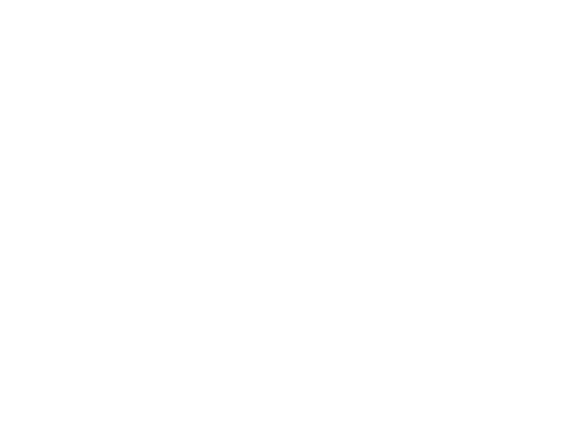

<IPython.core.display.Javascript object>


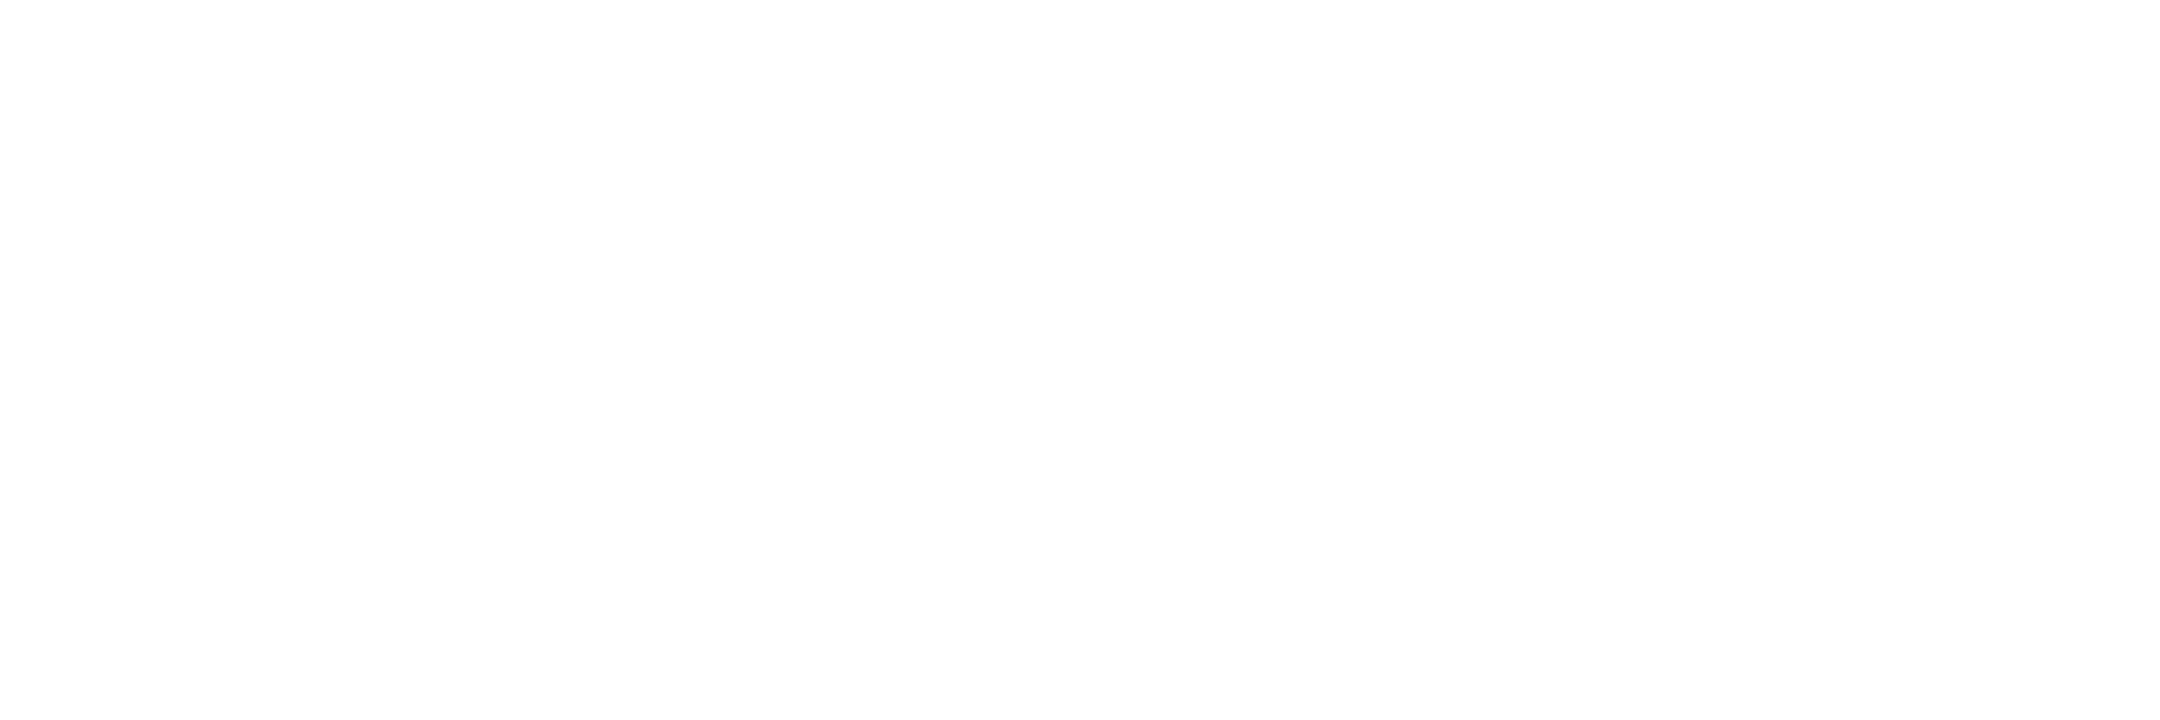

<IPython.core.display.Javascript object>


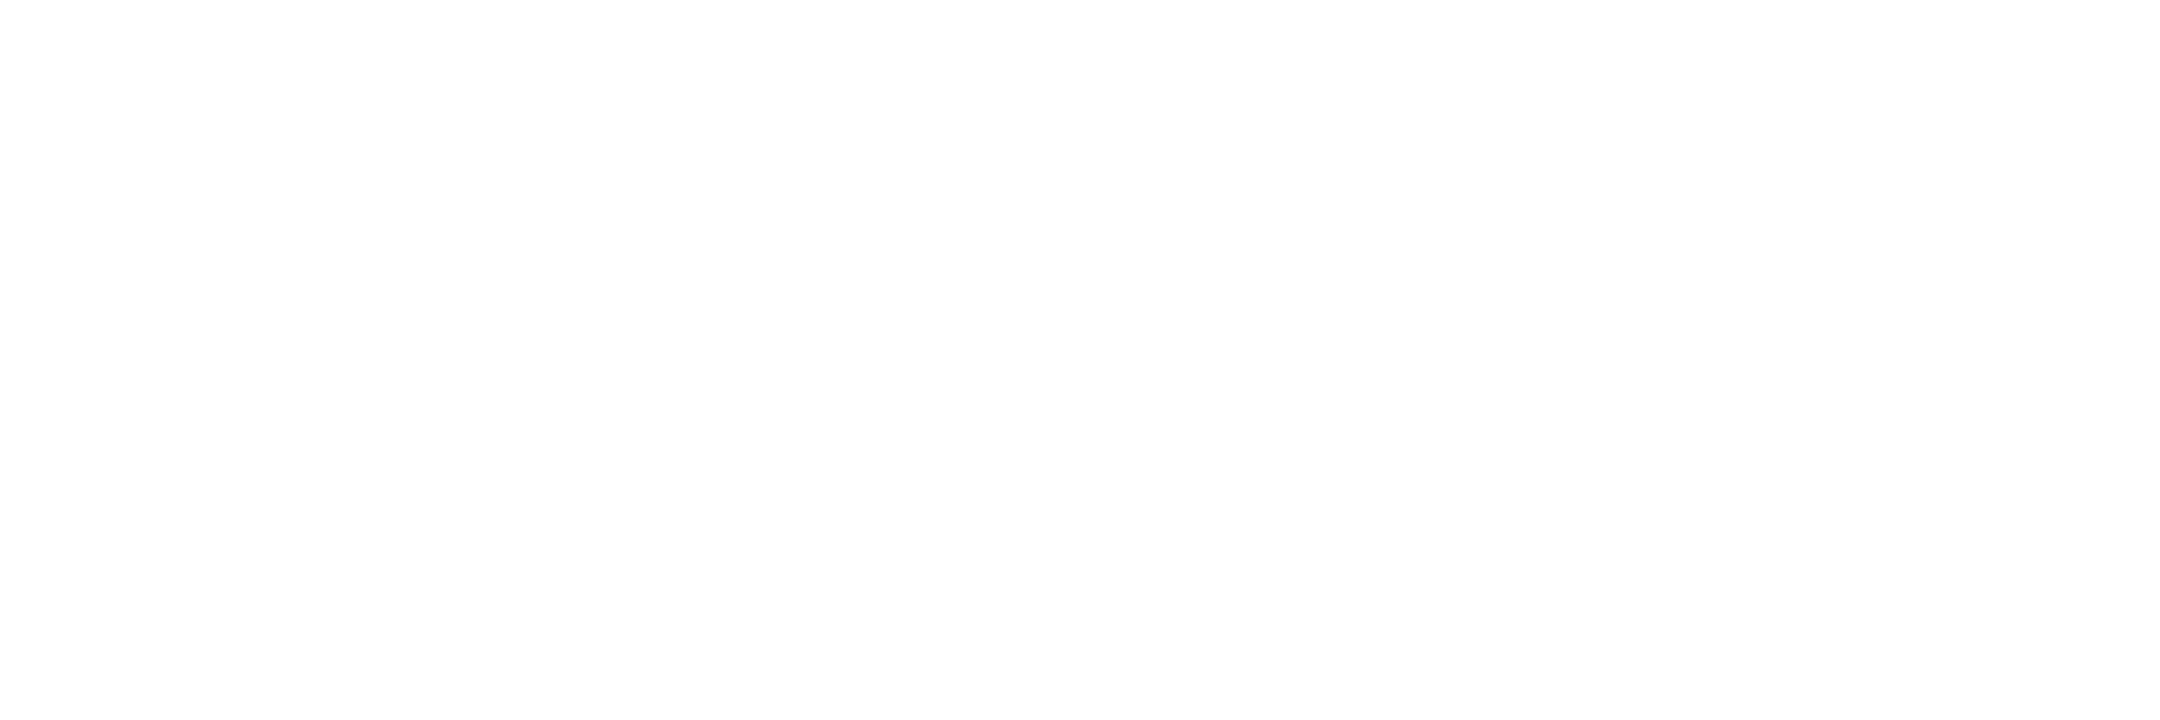

<IPython.core.display.Javascript object>


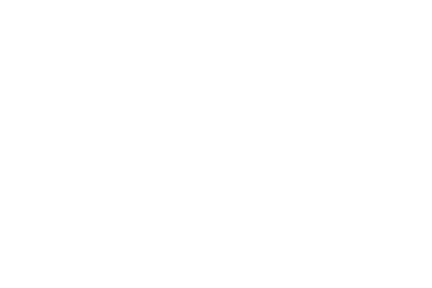

Plots created! Please check the directory "plot-poses" within the video directory


In [8]:
%matplotlib notebook
deeplabcut.plot_trajectories(path_config_file,videofile_path)